## Melendey diabetes data analysis

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## First, let us read the dataset

In [15]:
my_data = pd.read_csv("Melendey.csv")
my_data.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


## We don't need to know patient's ID and No. of patients, so let's do some cleaning

In [16]:
df = my_data.iloc[:,2:]
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


# Now make a copy of the original dataset and pre-procecess it

In [4]:
# First let's make a copy of the tailored database so we can implement changes
df_copy = df.copy()

In [20]:
# remove rows with class = "P" as we don't need that
df_copy = df_copy.drop(df_copy.index[df_copy['CLASS'] == "P"])

# then convert Male and Female to 1 and 0 through level, Class to be 1(Yes), 0(No), and get rid of P(predictice)
cleanup_nums = {"Gender":{"M": 1, "F": 0}, "CLASS":{"Y":1, "N":0 }}

# implement the replacing
df_copy = df_copy.replace(cleanup_nums)
df_copy.head()  # now it looks nice


,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


array([[<AxesSubplot:xlabel='Gender', ylabel='Gender'>,
        <AxesSubplot:xlabel='AGE', ylabel='Gender'>,
        <AxesSubplot:xlabel='Urea', ylabel='Gender'>,
        <AxesSubplot:xlabel='Cr', ylabel='Gender'>,
        <AxesSubplot:xlabel='HbA1c', ylabel='Gender'>,
        <AxesSubplot:xlabel='Chol', ylabel='Gender'>,
        <AxesSubplot:xlabel='TG', ylabel='Gender'>,
        <AxesSubplot:xlabel='HDL', ylabel='Gender'>,
        <AxesSubplot:xlabel='LDL', ylabel='Gender'>,
        <AxesSubplot:xlabel='VLDL', ylabel='Gender'>,
        <AxesSubplot:xlabel='BMI', ylabel='Gender'>,
        <AxesSubplot:xlabel='CLASS', ylabel='Gender'>],
       [<AxesSubplot:xlabel='Gender', ylabel='AGE'>,
        <AxesSubplot:xlabel='AGE', ylabel='AGE'>,
        <AxesSubplot:xlabel='Urea', ylabel='AGE'>,
        <AxesSubplot:xlabel='Cr', ylabel='AGE'>,
        <AxesSubplot:xlabel='HbA1c', ylabel='AGE'>,
        <AxesSubplot:xlabel='Chol', ylabel='AGE'>,
        <AxesSubplot:xlabel='TG', ylabel='AGE'>,


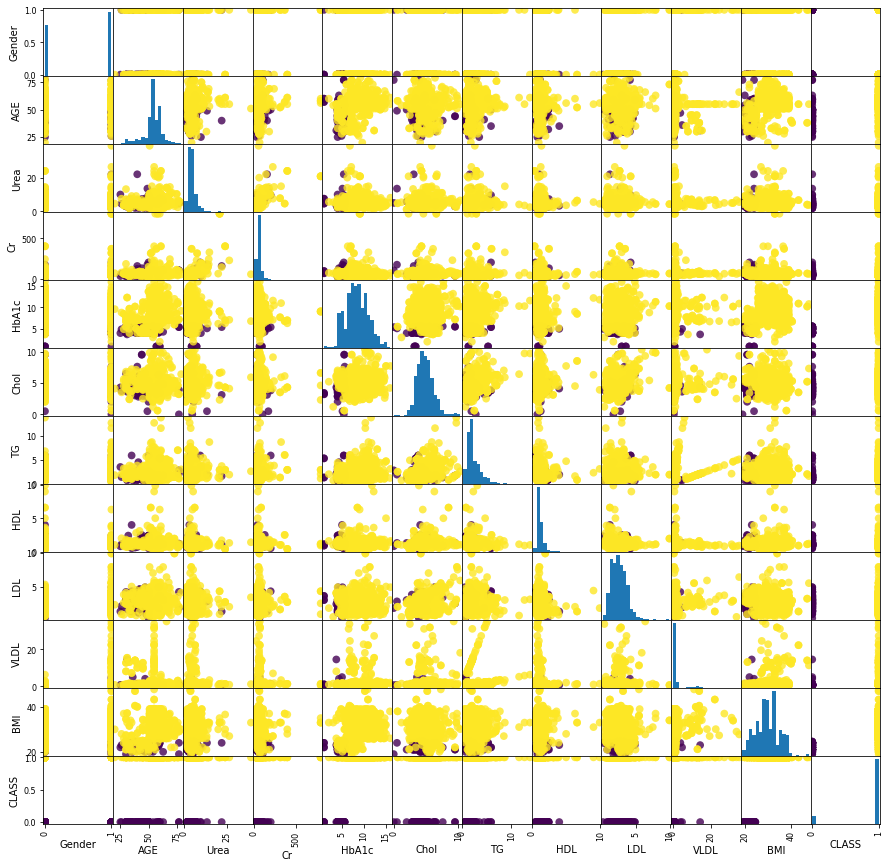

In [22]:
pd.plotting.scatter_matrix(df_copy, c=df_copy["CLASS"], figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)